In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from matplotlib.patches import Patch
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./Group_7_data_cleaned.csv")

In [3]:
df.drop(columns=['Date','Time'], inplace=True)

In [4]:
df.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.77,0,0,1
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.65,0,0,1
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.52,0,0,1
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.39,0,0,1
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.25,0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S1_Temp               10129 non-null  float64
 1   S2_Temp               10129 non-null  float64
 2   S3_Temp               10129 non-null  float64
 3   S4_Temp               10129 non-null  float64
 4   S1_Light              10129 non-null  int64  
 5   S2_Light              10129 non-null  int64  
 6   S3_Light              10129 non-null  int64  
 7   S4_Light              10129 non-null  int64  
 8   S1_Sound              10129 non-null  float64
 9   S2_Sound              10129 non-null  float64
 10  S3_Sound              10129 non-null  float64
 11  S4_Sound              10129 non-null  float64
 12  S5_CO2                10129 non-null  int64  
 13  S5_CO2_Slope          10129 non-null  float64
 14  S6_PIR                10129 non-null  int64  
 15  S7_PIR             

In [6]:
df_wo_light = df.drop(df.filter(regex='Light').columns, axis=1)

In [7]:
df_wo_light.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,0.08,0.19,0.06,0.06,390,0.77,0,0,1
1,24.94,24.75,24.56,25.44,0.93,0.05,0.06,0.06,390,0.65,0,0,1
2,25.00,24.75,24.50,25.44,0.43,0.11,0.08,0.06,390,0.52,0,0,1
3,25.00,24.75,24.56,25.44,0.41,0.10,0.10,0.09,390,0.39,0,0,1
4,25.00,24.75,24.56,25.44,0.18,0.06,0.06,0.06,390,0.25,0,0,1


In [8]:
X_wo_light = df_wo_light.drop(['Room_Occupancy_Count'], axis=1)
y_wo_light = df_wo_light[['Room_Occupancy_Count']]

In [9]:
# Splitting the dataset into train and test
X_train_wo_light, X_test_wo_light, y_train_wo_light, y_test_wo_light = train_test_split(X_wo_light, y_wo_light, test_size=0.2, random_state=42)

In [10]:
# Scaling the dataset
scaler = StandardScaler()
X_train_scaled_wo_light = scaler.fit_transform(X_train_wo_light)
X_test_scaled_wo_light = scaler.transform(X_test_wo_light)

### Applying PCA

In [11]:
pca = PCA()
pca.fit(X_train_scaled_wo_light)

PCA()

In [12]:
# To get the percentage of variance along each PC
per_var = np.round(pca.explained_variance_ratio_*100, 1)
per_var

array([51.9, 16.6,  6.8,  5. ,  4.5,  3.8,  3.3,  2.8,  2.3,  2. ,  0.6,
        0.3])

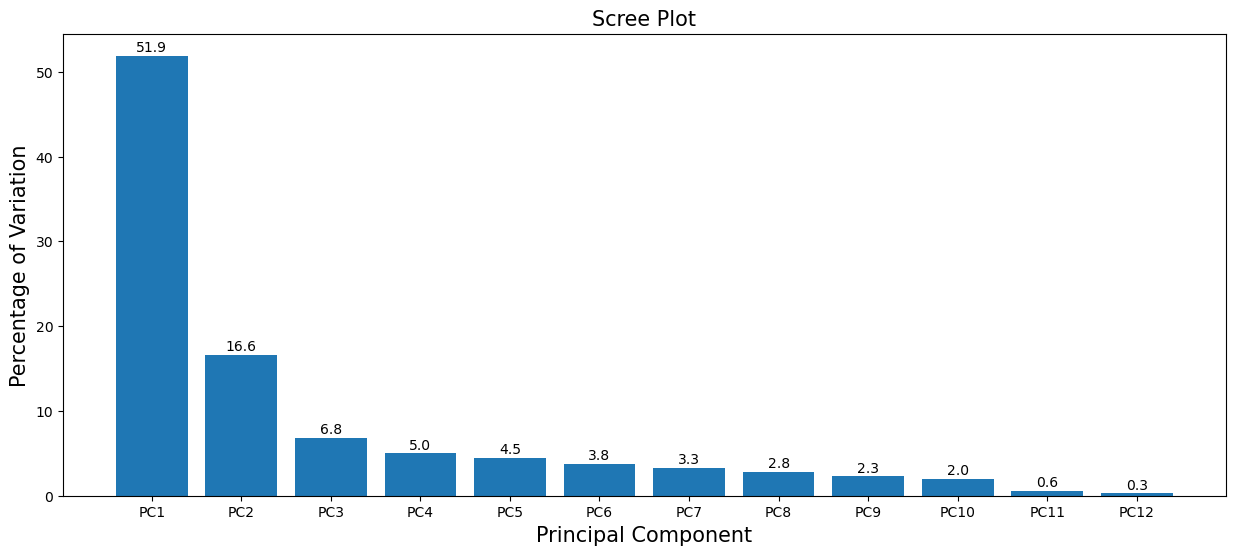

In [13]:
# Displaying the percentage of variance of principal components in a scree plot

# function to add value labels
def addlabels(x,y):
    for i in range(0,len(x)):
        plt.text(i+1, y[i]+0.5, y[i], ha = 'center')

plt.figure(figsize = (15,6))

princ_comp = ['PC' + str(x) for x in range(1,13)]

plt.bar(x = range(1,13), height = per_var, tick_label = princ_comp)

addlabels(x = princ_comp, y = per_var)
plt.grid(b=None)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 15)

plt.grid();

In [14]:
# Getting the coefficient contribution of every column in each PC
X_train_scaled_wo_light_pca_coeff = pd.DataFrame(data = pca.components_, columns = princ_comp, index = X_train_wo_light.columns)
round(X_train_scaled_wo_light_pca_coeff,2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
S1_Temp,0.35,0.33,0.34,0.30,0.27,0.26,0.28,0.26,0.32,0.15,0.26,0.28
S2_Temp,-0.31,-0.19,-0.34,-0.33,0.25,0.30,0.27,0.32,-0.28,0.40,0.20,0.21
S3_Temp,-0.03,-0.09,-0.04,-0.03,0.14,0.14,0.40,0.47,0.04,-0.62,-0.35,-0.26
S4_Temp,0.07,-0.02,0.10,0.20,-0.30,-0.09,0.18,0.24,-0.04,0.58,-0.64,-0.07
S1_Sound,0.03,0.08,0.01,0.27,0.49,0.32,-0.31,-0.05,-0.23,0.19,-0.04,-0.63
S2_Sound,0.01,-0.01,0.03,0.02,-0.45,0.82,-0.21,-0.10,-0.07,-0.14,-0.12,0.17
S3_Sound,-0.03,0.06,0.04,0.23,-0.53,-0.09,0.12,0.34,-0.26,0.01,0.55,-0.38
S4_Sound,-0.03,0.57,-0.22,-0.50,-0.15,0.10,0.11,-0.08,0.42,0.14,-0.01,-0.37
S5_CO2,-0.05,0.31,-0.04,-0.11,0.04,-0.14,-0.66,0.61,-0.03,-0.07,-0.08,0.21
S5_CO2_Slope,-0.20,0.64,-0.12,0.21,0.04,-0.07,0.23,-0.21,-0.54,-0.15,-0.15,0.22


In [30]:
# Getting the projected data in new coordinate system
pca_data = pca.transform(X_train_scaled_wo_light)
pca_df_all = pd.DataFrame(pca_data, columns = princ_comp)

In [31]:
pca_df = pca_df_all[['PC1', 'PC2']]
pca_df.head()

,PC1,PC2
0,-1.605885,0.524188
1,-0.986971,-0.011615
2,-0.349015,-1.649897
3,-0.536735,-0.731446
4,-0.861237,0.053268


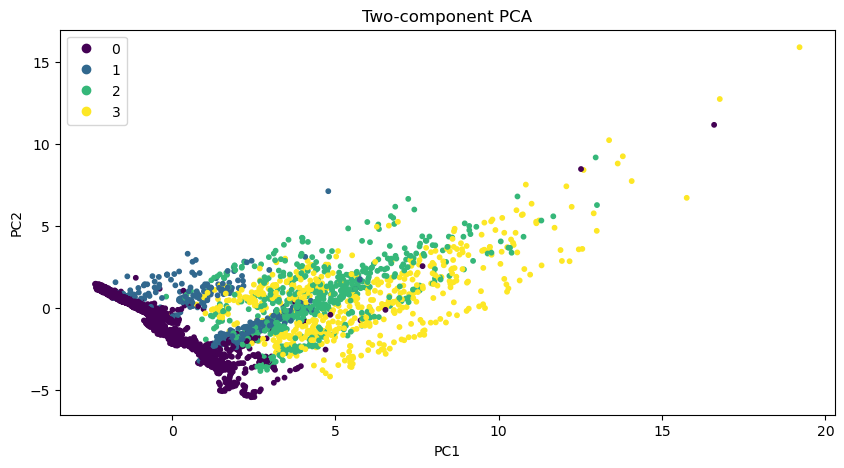

In [32]:
# Plotting the data points in this 2-dimensional coordinates system given by PC1 and PC2
fig_1 = plt.figure("Figure 1", figsize=(10,5))
scatter = plt.scatter(pca_df.PC1, pca_df.PC2, c=y_train_wo_light['Room_Occupancy_Count'], s=10)
plt.xlabel("PC1", fontsize = 10)
plt.ylabel("PC2", fontsize = 10)
plt.title("Two-component PCA", fontsize = 12)
plt.legend(*scatter.legend_elements())
plt.show();

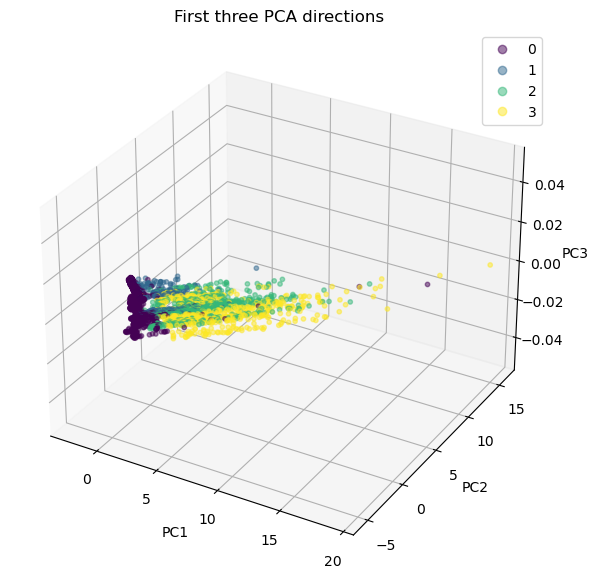

In [33]:
fig_2 = plt.figure("Figure 2", figsize=(7,7))
plt_1 = fig_2.add_subplot(111, projection='3d')
scatter = plt.scatter(pca_df.PC1, pca_df.PC2, c=y_train_wo_light['Room_Occupancy_Count'], s=10, alpha = 0.5)
plt_1.set_title("First three PCA directions")
plt_1.set_xlabel("PC1")
plt_1.set_ylabel("PC2")
plt_1.set_zlabel("PC3")
# plt.dist = 10
# plt.view_init(90, 0)
plt_1.legend(*scatter.legend_elements())
plt_1;

## Analysing PCA and clustering 

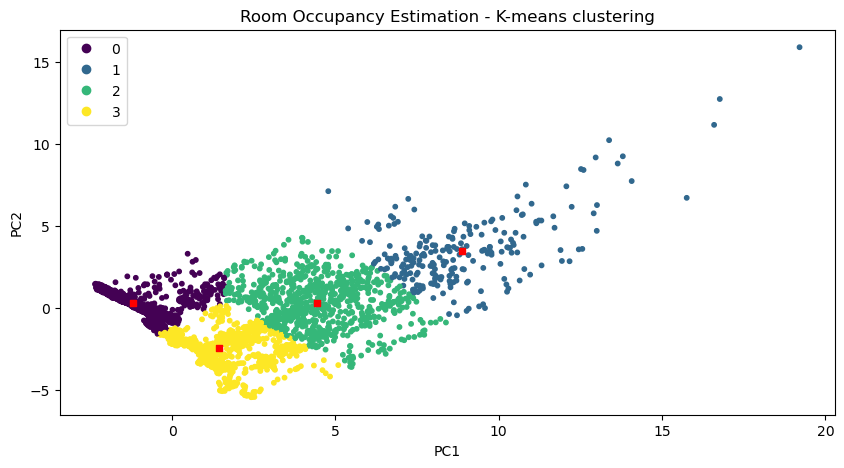

In [37]:
# Analyze the clustering 
# plt.clf() - To clear the output of matplotlib
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(pca_df)
clusters = kmeans.predict(pca_df)
plt.figure("Figure 3", figsize=(10,5))
scatter_1 = plt.scatter(pca_df.PC1, pca_df.PC2, c=clusters,s=10)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="red", marker="s", s=20)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(*scatter_1.legend_elements())
plt.title("Room Occupancy Estimation - K-means clustering")
plt.show()

In [35]:
silhouette_score(pca_df, kmeans.labels_)

0.6286799475882884

### Insights

When performed kmeans clustering on the overall dataset we got a silhouette score of 0.525. When performed clustering on the PC1 and PC2, we get a silhouette score of 0.629.

- __Cluster Seperation:-__ The better silhouette score suggests that PCA can help in identifying clusters that are successful in grouping similar data points together and clusters that are well-separated. 
- __Clustering Performance:-__ The better silhouette score shows that the quality of clustering improves when using PCA. In the case of a linearly separable dataset, PCA proves to be efficient at reducing dimensionality while preserving the most important information. PCA can be used for feature selection and further data analysis. 